## 分类数据

### 背景和目的

示例1：使用`pd.unique()`和`pd.value_counts()`从数据中提取不同值，并分别计算频率

In [1]:
import numpy as np; import pandas as pd

In [2]:
values = pd.Series(['apple', 'orange', 'apple',
                        'apple'] * 2)
values

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: object

In [3]:
pd.unique(values)

array(['apple', 'orange'], dtype=object)

In [5]:
pd.value_counts(values)

apple     6
orange    2
dtype: int64

许多数据系统（数据仓库、统计计算或其它应用）都发展出了特定的表征重复值的方法，以进行高效的存储和计算。在数据仓库中，最好的方法是使用所谓的包含不同值的维表(Dimension Table)，将主要的参数存储为引用维表整数键：

示例2：根据字段(values)从另一个表中读取数据(values)  
**Note:s.take()**

In [7]:
values = pd.Series([0,1,0,0]*2)
dim = pd.Series(['apple', 'orange'])
display(values, dim)

0    0
1    1
2    0
3    0
4    0
5    1
6    0
7    0
dtype: int64

0     apple
1    orange
dtype: object

In [8]:
dim.take(values)

0     apple
1    orange
0     apple
0     apple
0     apple
1    orange
0     apple
0     apple
dtype: object

这种用整数表示的方法称为分类或字典编码表示法。不同值得数组称为分类、字典或数据级。本书中，我们使用分类的说法。表示分类的整数值称为分类编码或简单地称为编码。

分类表示可以在进行分析时大大的提高性能。你也可以在保持编码不变的情况下，对分类进行转换。一些相对简单的转变例子包括：

+    重命名分类。
+    加入一个新的分类，不改变已经存在的分类的顺序或位置。


### Pandas的分类类型

pandas有一个特殊的分类类型(category)，用于保存使用整数分类表示法的数据

In [11]:
fruits = ['apple', 'orange', 'apple', 'apple'] * 2 
N = len(fruits)
df = pd.DataFrame({
    "fruit":fruits,
    'basket_id':np.arange(N),
    'count':np.random.randint(3,13,size=N),
    'weight':np.random.uniform(0, 4, size=N)},
    columns=['basket_id', 'fruit', 'count', 'weight'])
df

,basket_id,fruit,count,weight
0,0,apple,5,3.443358
1,1,orange,10,3.769315
2,2,apple,4,3.613849
3,3,apple,4,3.626218
4,4,apple,5,0.435954
5,5,orange,7,3.241405
6,6,apple,10,3.824108
7,7,apple,12,2.702095


示例1：将df['fruits']进行分类

In [14]:
fruit_cat = df['fruit'].astype('category')
fruit_cat

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): [apple, orange]

得到的是一个pandas.Categorical实例

In [15]:
c = fruit_cat.values
type(c)

pandas.core.arrays.categorical.Categorical

示例2：获取pd.Categorical的categories和code属性

In [17]:
c.categories

Index(['apple', 'orange'], dtype='object')

In [18]:
c.codes

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

示例3：将原先的df中fruit列转换为分类

In [20]:
df['fruit'] = df['fruit'].astype('category')
df.fruit

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): [apple, orange]

示例4：从python序列中直接创建pd.Categorical


In [21]:
pd.Categorical(['a','b','c','a','a','c'])

[a, b, c, a, a, c]
Categories (3, object): [a, b, c]

示例5：根据分类编码创建Categorical

In [23]:
categorical = ['foo', 'bar', 'baz']
codes= [0,1,1,2,0,0,2]
pd.Categorical.from_codes(codes,categorical)

[foo, bar, bar, baz, foo, foo, baz]
Categories (3, object): [foo, bar, baz]

与显示指定不同，分类变换不认定指定的分类顺序。因此取决于输入数据的顺序，categories数组的顺序会不同。当使用from_codes或其它的构造器时，你可以指定分类一个有意义的顺序：

In [25]:
pd.Categorical.from_codes(codes, categorical, ordered=True)

[foo, bar, bar, baz, foo, foo, baz]
Categories (3, object): [foo < bar < baz]

输出[foo < bar < baz]指明‘foo’位于‘bar’的前面，以此类推。无序的分类实例可以通过as_ordered排序：

In [27]:
pd.Categorical.from_codes(codes, categorical).as_ordered()

[foo, bar, bar, baz, foo, foo, baz]
Categories (3, object): [foo < bar < baz]

最后要注意，分类数据不需要字符串，尽管我仅仅展示了字符串的例子。分类数组可以包括任意不可变类型。

### 用分类进行计算


In [2]:
np.random.seed(12345)
draws = np.random.randn(1000)
draws[:5]

array([-0.20470766,  0.47894334, -0.51943872, -0.5557303 ,  1.96578057])

用分位数进行分类

In [3]:
bins = pd.qcut(draws, 4)
bins

[(-0.684, -0.0101], (-0.0101, 0.63], (-0.684, -0.0101], (-0.684, -0.0101], (0.63, 3.928], ..., (-0.0101, 0.63], (-0.684, -0.0101], (-2.9499999999999997, -0.684], (-0.0101, 0.63], (0.63, 3.928]]
Length: 1000
Categories (4, interval[float64]): [(-2.9499999999999997, -0.684] < (-0.684, -0.0101] < (-0.0101, 0.63] < (0.63, 3.928]]

示例2：用分位数进行分类并起别名

In [4]:
bins = pd.qcut(draws, 4, labels=['Q1','Q2', 'Q3', 'Q4'])
bins

[Q2, Q3, Q2, Q2, Q4, ..., Q3, Q2, Q1, Q3, Q4]
Length: 1000
Categories (4, object): [Q1 < Q2 < Q3 < Q4]

示例3：根据bins对draws进行分类并聚合

In [8]:
bins = pd.Series(bins, name='quartile')

results = (pd.Series(draws).
          groupby(bins).
          agg(['count', 'min', 'max']).
          reset_index())
results

,quartile,count,min,max
0,Q1,250,-2.949343,-0.685484
1,Q2,250,-0.683066,-0.010115
2,Q3,250,-0.010032,0.628894
3,Q4,250,0.634238,3.927528


In [9]:
results['quartile']

0    Q1
1    Q2
2    Q3
3    Q4
Name: quartile, dtype: category
Categories (4, object): [Q1 < Q2 < Q3 < Q4]

### 用分类提高性能

In [10]:
N = 10000000

draws = pd.Series(np.random.randn(N))

labels = pd.Series(['foo', 'bar', 'baz', 'qux'] * (N // 4))

In [11]:
categories = labels.astype('category')

In [12]:
labels.memory_usage()


80000080

In [14]:
categories.memory_usage()

10000272

由上面可以看出使用标签浪费的内存比不使用标签浪费的内存小很多

而且将标签转换维分类几乎没有代价，而且是一次性的

In [17]:
%timeit _ = labels.astype('category')

822 ms ± 5.19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### 分类方法

包含分类数据的Series有一些特殊的方法，类似于Series.str字符串方法。它还提供了方便的分类和编码的使用方法。看下面的Series：

In [19]:
s = pd.Series(['a', 'b','c','d'] *2)
cat_s = s.astype('category')
cat_s


0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): [a, b, c, d]

获取分类Series的分类码

In [23]:
cat_s.cat.codes

0    0
1    1
2    2
3    3
4    0
5    1
6    2
7    3
dtype: int8

In [24]:
cat_s.cat.categories

Index(['a', 'b', 'c', 'd'], dtype='object')

示例1：重新设置分类

In [26]:
actual_categories = ['a', 'b', 'c', 'd', 'e']
cat_s2 = cat_s.cat.set_categories(actual_categories)
cat_s2

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (5, object): [a, b, c, d, e]

示例2：获取每种分类的item数

In [27]:
cat_s.value_counts()

d    2
c    2
b    2
a    2
dtype: int64

In [28]:
cat_s2.value_counts()

d    2
c    2
b    2
a    2
e    0
dtype: int64

在大数据集中，分类经常作为节省内存和高性能的便捷工具。过滤完大DataFrame或Series之后，许多分类可能不会出现在数据中。我们可以使用remove_unused_categories方法删除没看到的分类：


In [29]:
cat_s3 = cat_s[cat_s.isin(['a', 'b'])]
cat_s3

0    a
1    b
4    a
5    b
dtype: category
Categories (4, object): [a, b, c, d]

In [31]:
cat_s3.cat.remove_unused_categories()

0    a
1    b
4    a
5    b
dtype: category
Categories (2, object): [a, b]

可用分类的方法

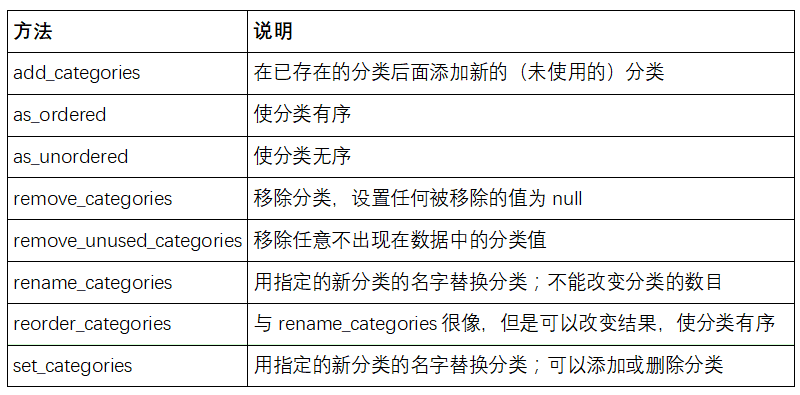

### 为建模创建虚拟变量(dummies)

In [32]:
cat_s = pd.Series(['a', 'b', 'c', 'd']*2, dtype='category')
cat_s

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): [a, b, c, d]

In [33]:
pd.get_dummies(cat_s)

,a,b,c,d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1


## 链式编程技术

当对数据集进行一系列变换时，你可能发现创建的多个临时变量其实并没有在分析中用到。看下面的例子：

```python
df = load_data()
df2 = df[df['col2'] < 0]
df2['col1_demeaned'] = df2['col1'] - df2['col1'].mean()
result = df2.groupby('key').col1_demeaned.std()
```

首先，DataFrame.assign方法是一个df[k] = v形式的函数式的列分配方法。它不是就地修改对象，而是返回新的修改过的DataFrame。因此，下面的语句是等价的

```python
# Usual non-functional way
df2 = df.copy()
df2['k'] = v

# Functional assign way
df2 = df.assign(k=v)
```

就地分配可能会比assign快，但是assign可以方便地进行链式编程：


```python
result = (df2.assign(coll_demeaned=df2.col1 - df2.col1.mean())
         .groupby('key')
         .col1_demeaned.std())
```

使用链式编程时要注意，你可能会需要涉及临时对象。在前面的例子中，我们不能使用load_data的结果，直到它被赋值给临时变量df。为了这么做，assign和许多其它pandas函数可以接收类似函数的参数，即可调用对象（callable）。为了展示可调用对象，看一个前面例子的片段

```python
df = load_data()
df = df[df['col2'] < 0 ]


df = (load_data()
     [lambda x: x['col2'] < 0])
```

示例1：把整个过程写出单链模式

```python
result = (load_data()
         [lambda x:x['col2'] < 0]
         .assign(col1_demeaned= lambda x:x.col1 - x.col1.mean())
         .groupby('key')
         .col1_demeaned
         .std())

```

### 管道模式

你可以用Python内置的pandas函数和方法，用带有可调用对象的链式编程做许多工作。但是，有时你需要使用自己的函数，或是第三方库的函数。这时就要用到管道方法。

```python
a = f(df, arg1=v1)
b = g(a, v2, arg3=v3)
c = h(b, arg4=v4)
```

当使用接收、返回Series或DataFrame对象的函数式，你可以调用pipe将其重写：


```python
result = (df.pipe(f, arg1=v1)
         .pipe(g, v2, arg3=v3)
         .pipe(h, arg4=v4))
```

pipe的另一个有用的地方是提炼操作为可复用的函数。看一个从列减去分组方法的例子：

```python
g = df.groupby(['key1', 'key2'])
df['col1'] = df['col1'] - g.mean()
```

假设你想转换多列，并修改分组的键。另外，你想用链式编程做这个转换。下面就是一个方法：

```python
def group_demean(df, by, cols):
    result = df.copy()
    g = df.groupby(by)
    for c in cols:
        result[c] = df[c] - g[c].transform('mean')
    return result
```

然后可以写出如下：

```python
result = (df[df.col1<0]
         .pipe(group_demean, ['key1', 'key2'], ['col1']))

```